Reading the first dataset for creating clustering data_1

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Read the CSV file into a pandas DataFrame
df_1 = pd.read_csv('/content/drive/My Drive/BOE/general_data.csv')

# Now you can work with the DataFrame, for example, display its contents
print(df_1)

         Firm  NWP_2016  NWP_2017  NWP_2018  NWP_2019  NWP_2020  \
0         NaN    2016YE    2017YE    2018YE    2019YE    2020YE   
1      Firm_1  -17754.1         0         0         0         0   
2      Firm_2      9.24       0.1     40.81     35.64     13.63   
3      Firm_3         0      0.81     36.62     86.63     54.74   
4      Firm_4  19677.45  41072.82  20885.51  14719.67  49204.47   
..        ...       ...       ...       ...       ...       ...   
322  Firm_322   3315.47   4136.48   2192.75   2252.92   2780.63   
323  Firm_323         0         0         0         0         0   
324  Firm_324     29.81        21     13.55      6.15     49.79   
325  Firm_325    108.47     496.3    437.22    120.65         0   
326       NaN       NaN       NaN       NaN       NaN       NaN   

    SCR_coverage_ratio_2016 SCR_coverage_ratio_2017 SCR_coverage_ratio_2018  \
0                    2016YE                  2017YE                  2018YE   
1                      0.16          

In [3]:
#transforming data through pivoting using melt function
melted_df_1 = pd.melt(df_1, id_vars=['Firm'], var_name='metric', value_name='values')

print(melted_df_1)


          Firm       metric    values
0          NaN     NWP_2016    2016YE
1       Firm_1     NWP_2016  -17754.1
2       Firm_2     NWP_2016      9.24
3       Firm_3     NWP_2016         0
4       Firm_4     NWP_2016  19677.45
...        ...          ...       ...
6535  Firm_322  Equity_2020   3640.24
6536  Firm_323  Equity_2020      2.73
6537  Firm_324  Equity_2020     21.92
6538  Firm_325  Equity_2020         0
6539       NaN  Equity_2020       NaN

[6540 rows x 3 columns]


In [4]:
#ordering by firm name
sorted_df_1 = melted_df_1.sort_values(by='Firm')
print(sorted_df_1)

        Firm       metric    values
1     Firm_1     NWP_2016  -17754.1
4579  Firm_1     GWP_2020         0
5233  Firm_1  Equity_2017       4.4
4252  Firm_1     GWP_2019         0
328   Firm_1     NWP_2017         0
...      ...          ...       ...
5885     NaN  Equity_2018       NaN
5886     NaN  Equity_2019    2019YE
6212     NaN  Equity_2019       NaN
6213     NaN  Equity_2020    2020YE
6539     NaN  Equity_2020       NaN

[6540 rows x 3 columns]


In [5]:
#removing rows with blanks in the column Firm
cleaned_df_1 = sorted_df_1.dropna(subset=['Firm'])
print(cleaned_df_1)


         Firm                   metric    values
1      Firm_1                 NWP_2016  -17754.1
4579   Firm_1                 GWP_2020         0
5233   Firm_1              Equity_2017       4.4
4252   Firm_1                 GWP_2019         0
328    Firm_1                 NWP_2017         0
...       ...                      ...       ...
5004  Firm_99              Equity_2016     64.29
2061  Firm_99  SCR_coverage_ratio_2017      1.21
1407  Firm_99                 NWP_2020    142.51
3369  Firm_99                 GWP_2016     178.7
99    Firm_99                 NWP_2016     281.4

[6500 rows x 3 columns]


In [6]:
#creating a year and metric column from the dataset
cleaned_df_1['Year'] = cleaned_df_1['metric'].str[-4:]
cleaned_df_1['Metric'] = cleaned_df_1['metric'].str[:-5]
treated_df_1 = cleaned_df_1.drop('metric', axis=1)

#typecasting value column as numeric
treated_df_1['values'] = pd.to_numeric(treated_df_1['values'])
print(treated_df_1)

         Firm    values  Year              Metric
1      Firm_1 -17754.10  2016                 NWP
4579   Firm_1      0.00  2020                 GWP
5233   Firm_1      4.40  2017              Equity
4252   Firm_1      0.00  2019                 GWP
328    Firm_1      0.00  2017                 NWP
...       ...       ...   ...                 ...
5004  Firm_99     64.29  2016              Equity
2061  Firm_99      1.21  2017  SCR_coverage_ratio
1407  Firm_99    142.51  2020                 NWP
3369  Firm_99    178.70  2016                 GWP
99    Firm_99    281.40  2016                 NWP

[6500 rows x 4 columns]


<ipython-input-6-b38f4b0d0cf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_1['Year'] = cleaned_df_1['metric'].str[-4:]
<ipython-input-6-b38f4b0d0cf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_1['Metric'] = cleaned_df_1['metric'].str[:-5]


In [ ]:
print(treated_df_1)

In [7]:
#recasting the transformed table
pivoted_df_1 = treated_df_1.pivot(index=['Firm','Year'],columns=("Metric"), values='values')
print(pivoted_df_1)

Metric         Equity     GWP       NWP  SCR_coverage_ratio
Firm    Year                                               
Firm_1  2016  1243.92   46.77 -17754.10                0.16
        2017     4.40    0.00      0.00         55887003.06
        2018     0.00    0.00      0.00                0.00
        2019     0.00    0.00      0.00                0.00
        2020     0.00    0.00      0.00                0.00
...               ...     ...       ...                 ...
Firm_99 2016    64.29  178.70    281.40                2.14
        2017   480.43  557.71    120.76                1.21
        2018   634.15  421.34    308.35                0.75
        2019    37.81  932.92    112.03                0.21
        2020   245.32  465.69    142.51                2.50

[1625 rows x 4 columns]


In [8]:
#retaining the Year and Metric columns in the dataset
pivot_table_reset_1 = pivoted_df_1.reset_index()
print(pivot_table_reset_1)

Metric     Firm  Year   Equity     GWP       NWP  SCR_coverage_ratio
0        Firm_1  2016  1243.92   46.77 -17754.10                0.16
1        Firm_1  2017     4.40    0.00      0.00         55887003.06
2        Firm_1  2018     0.00    0.00      0.00                0.00
3        Firm_1  2019     0.00    0.00      0.00                0.00
4        Firm_1  2020     0.00    0.00      0.00                0.00
...         ...   ...      ...     ...       ...                 ...
1620    Firm_99  2016    64.29  178.70    281.40                2.14
1621    Firm_99  2017   480.43  557.71    120.76                1.21
1622    Firm_99  2018   634.15  421.34    308.35                0.75
1623    Firm_99  2019    37.81  932.92    112.03                0.21
1624    Firm_99  2020   245.32  465.69    142.51                2.50

[1625 rows x 6 columns]


In [9]:
columns_list = pivot_table_reset_1.columns.tolist()

print(columns_list)

['Firm', 'Year', 'Equity', 'GWP', 'NWP', 'SCR_coverage_ratio']


In [38]:
schema = pivoted_df_1.dtypes

print(schema)

Metric
Equity                float64
GWP                   float64
NWP                   float64
SCR_coverage_ratio    float64
dtype: object


In [10]:
#aggregating and taking an average across the years for creating dataset for clustering

# Group the data by 'Category' and 'Subcategory', then calculate the average using 'mean()'
cluster_data_1 = pivot_table_reset_1.groupby(['Firm'])['Equity','GWP','NWP','SCR_coverage_ratio'].mean().reset_index()

print(cluster_data_1)


Metric      Firm    Equity       GWP       NWP  SCR_coverage_ratio
0         Firm_1   249.664     9.354 -3550.820        1.117740e+07
1        Firm_10  7289.004  6200.640  3269.050        1.118000e+00
2       Firm_100   136.324    24.972    29.808        1.292000e+00
3       Firm_101  7730.016  6633.498  3687.636        1.084000e+00
4       Firm_102     2.346     0.000     0.000        2.734000e+00
..           ...       ...       ...       ...                 ...
320      Firm_95    20.168     0.008     0.004        6.122000e+00
321      Firm_96    50.864    -0.002    -0.004        8.680000e-01
322      Firm_97    54.188     7.500     6.196        2.018000e+00
323      Firm_98     2.516     0.000     0.000        3.280000e+00
324      Firm_99   292.400   511.272   193.010        1.362000e+00

[325 rows x 5 columns]


<ipython-input-10-3c6a680c25cb>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_data_1 = pivot_table_reset_1.groupby(['Firm'])['Equity','GWP','NWP','SCR_coverage_ratio'].mean().reset_index()


Reading the second dataset for creating clustering data_2

In [11]:
# Read the CSV file into a pandas DataFrame
df_2 = pd.read_csv('/content/drive/My Drive/BOE/underwriting_data.csv')

# Now you can work with the DataFrame, for example, display its contents
print(df_2)

         Firm gross_claims_incurred_2016 gross_claims_incurred_2017  \
0         NaN                     2016YE                     2017YE   
1      Firm_1                          0                       0.01   
2      Firm_2                      44.47                      29.49   
3      Firm_3                          0                          0   
4      Firm_4                      14.34                      71.06   
..        ...                        ...                        ...   
452  Firm_452                          0                          0   
453  Firm_453                       8.39                      -1.74   
454  Firm_454                          2                       3.69   
455  Firm_455                          0                       4.55   
456  Firm_456                          0                          0   

    gross_claims_incurred_2018 gross_claims_incurred_2019  \
0                       2018YE                     2019YE   
1                        

In [12]:
#transforming data through pivoting using melt function
melted_df_2 = pd.melt(df_2, id_vars=['Firm'], var_name='metric', value_name='values')

print(melted_df_2)


          Firm                      metric  values
0          NaN  gross_claims_incurred_2016  2016YE
1       Firm_1  gross_claims_incurred_2016       0
2       Firm_2  gross_claims_incurred_2016   44.47
3       Firm_3  gross_claims_incurred_2016       0
4       Firm_4  gross_claims_incurred_2016   14.34
...        ...                         ...     ...
4565  Firm_452    net _combined_ratio_2020       0
4566  Firm_453    net _combined_ratio_2020       0
4567  Firm_454    net _combined_ratio_2020    5.83
4568  Firm_455    net _combined_ratio_2020   -0.77
4569  Firm_456    net _combined_ratio_2020       0

[4570 rows x 3 columns]


In [13]:
#ordering by firm name
sorted_df_2 = melted_df_2.sort_values(by='Firm')
print(sorted_df_2)

        Firm                      metric  values
1     Firm_1  gross_claims_incurred_2016       0
1372  Firm_1  gross_claims_incurred_2019       0
458   Firm_1  gross_claims_incurred_2017    0.01
1829  Firm_1  gross_claims_incurred_2020       0
2286  Firm_1    net _combined_ratio_2016       0
...      ...                         ...     ...
2285     NaN    net _combined_ratio_2016  2016YE
2742     NaN    net _combined_ratio_2017  2017YE
3199     NaN    net _combined_ratio_2018  2018YE
3656     NaN    net _combined_ratio_2019  2019YE
4113     NaN    net _combined_ratio_2020  2020YE

[4570 rows x 3 columns]


In [14]:
#removing rows with blanks in the column Firm
cleaned_df_2 = sorted_df_2.dropna(subset=['Firm'])
print(cleaned_df_2)


         Firm                      metric values
1      Firm_1  gross_claims_incurred_2016      0
1372   Firm_1  gross_claims_incurred_2019      0
458    Firm_1  gross_claims_incurred_2017   0.01
1829   Firm_1  gross_claims_incurred_2020      0
2286   Firm_1    net _combined_ratio_2016      0
...       ...                         ...    ...
1470  Firm_99  gross_claims_incurred_2019  -2.41
1013  Firm_99  gross_claims_incurred_2018   3.28
556   Firm_99  gross_claims_incurred_2017  12.18
1927  Firm_99  gross_claims_incurred_2020   2.19
4212  Firm_99    net _combined_ratio_2020      0

[4560 rows x 3 columns]


In [15]:
#creating a year and metric column from the dataset
cleaned_df_2['Year'] = cleaned_df_2['metric'].str[-4:]
cleaned_df_2['Metric'] = cleaned_df_2['metric'].str[:-5]
treated_df_2 = cleaned_df_2.drop('metric', axis=1)

#typecasting value column as numeric
treated_df_2['values'] = pd.to_numeric(treated_df_2['values'])
print(treated_df_2)

         Firm  values  Year                 Metric
1      Firm_1    0.00  2016  gross_claims_incurred
1372   Firm_1    0.00  2019  gross_claims_incurred
458    Firm_1    0.01  2017  gross_claims_incurred
1829   Firm_1    0.00  2020  gross_claims_incurred
2286   Firm_1    0.00  2016    net _combined_ratio
...       ...     ...   ...                    ...
1470  Firm_99   -2.41  2019  gross_claims_incurred
1013  Firm_99    3.28  2018  gross_claims_incurred
556   Firm_99   12.18  2017  gross_claims_incurred
1927  Firm_99    2.19  2020  gross_claims_incurred
4212  Firm_99    0.00  2020    net _combined_ratio

[4560 rows x 4 columns]


<ipython-input-15-fbbb3a63147f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2['Year'] = cleaned_df_2['metric'].str[-4:]
<ipython-input-15-fbbb3a63147f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2['Metric'] = cleaned_df_2['metric'].str[:-5]


In [78]:
print(treated_df_2)

         Firm  values  Year                 Metric
1      Firm_1    0.00  2016  gross_claims_incurred
1372   Firm_1    0.00  2019  gross_claims_incurred
458    Firm_1    0.01  2017  gross_claims_incurred
1829   Firm_1    0.00  2020  gross_claims_incurred
2286   Firm_1    0.00  2016    net _combined_ratio
...       ...     ...   ...                    ...
1470  Firm_99   -2.41  2019  gross_claims_incurred
1013  Firm_99    3.28  2018  gross_claims_incurred
556   Firm_99   12.18  2017  gross_claims_incurred
1927  Firm_99    2.19  2020  gross_claims_incurred
4212  Firm_99    0.00  2020    net _combined_ratio

[4560 rows x 4 columns]


In [16]:
#recasting the transformed table
pivoted_df_2 = treated_df_2.pivot(index=['Firm','Year'],columns=("Metric"), values='values')
print(pivoted_df_2)

Metric        gross_claims_incurred  net _combined_ratio
Firm    Year                                            
Firm_1  2016                   0.00                 0.00
        2017                   0.01                71.30
        2018                   0.00                 0.00
        2019                   0.00                 0.00
        2020                   0.00                 0.00
...                             ...                  ...
Firm_99 2016                 116.53                 0.00
        2017                  12.18            -73450.27
        2018                   3.28                 0.00
        2019                  -2.41                 0.00
        2020                   2.19                 0.00

[2280 rows x 2 columns]


In [17]:
#retaining the Year and Metric columns in the dataset
pivot_table_reset_2 = pivoted_df_2.reset_index()
print(pivot_table_reset_2)

Metric     Firm  Year  gross_claims_incurred  net _combined_ratio
0        Firm_1  2016                   0.00                 0.00
1        Firm_1  2017                   0.01                71.30
2        Firm_1  2018                   0.00                 0.00
3        Firm_1  2019                   0.00                 0.00
4        Firm_1  2020                   0.00                 0.00
...         ...   ...                    ...                  ...
2275    Firm_99  2016                 116.53                 0.00
2276    Firm_99  2017                  12.18            -73450.27
2277    Firm_99  2018                   3.28                 0.00
2278    Firm_99  2019                  -2.41                 0.00
2279    Firm_99  2020                   2.19                 0.00

[2280 rows x 4 columns]


In [19]:
columns_list = pivot_table_reset_2.columns.tolist()

print(columns_list)

['Firm', 'Year', 'gross_claims_incurred', 'net _combined_ratio']


In [82]:
schema = pivoted_df_2.dtypes

print(schema)

Metric
gross_claims_incurred    float64
net _combined_ratio      float64
dtype: object


In [18]:
#aggregating and taking an average across the years for creating dataset for clustering

# Group the data by 'Category' and 'Subcategory', then calculate the average using 'mean()'
cluster_data_2 = pivoted_df_2.groupby(['Firm'])['gross_claims_incurred','net _combined_ratio'].mean().reset_index()

print(cluster_data_2)


Metric      Firm  gross_claims_incurred  net _combined_ratio
0         Firm_1                  0.002               14.260
1        Firm_10                111.120                0.804
2       Firm_100                152.224                0.310
3       Firm_101                  0.000                0.000
4       Firm_102                304.844                1.168
..           ...                    ...                  ...
451      Firm_95                  0.000                0.000
452      Firm_96                344.746                0.368
453      Firm_97                 98.280                0.488
454      Firm_98                  0.000                0.000
455      Firm_99                 26.354           -14690.054

[456 rows x 3 columns]


<ipython-input-18-666c968a8ba3>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_data_2 = pivoted_df_2.groupby(['Firm'])['gross_claims_incurred','net _combined_ratio'].mean().reset_index()


In [21]:
columns_list = cluster_data_2.columns.tolist()

print(columns_list)

['Firm', 'gross_claims_incurred', 'net _combined_ratio']


Data Quality Analysis for the two datasets

In [19]:
#checking for NA values in both datasets

na_values_series_1 = cluster_data_1.isna()

# Check if there is any True in the Series
any_true_in_series_1 = na_values_series_1.any()

print(any_true_in_series_1)

na_values_series_2 = cluster_data_2.isna()

# Check if there is any True in the Series
any_true_in_series_2 = na_values_series_1.any()

print(any_true_in_series_2)

#There are no Na values


Metric
Firm                  False
Equity                False
GWP                   False
NWP                   False
SCR_coverage_ratio    False
dtype: bool
Metric
Firm                  False
Equity                False
GWP                   False
NWP                   False
SCR_coverage_ratio    False
dtype: bool


In [20]:
# Check if there are any NaN values in each column
any_nan_values = cluster_data_1.any()
print(any_nan_values)

any_empty_strings = cluster_data_2.any()
print(any_empty_strings)

#there are no empty spaces in the dataset

Metric
Firm                  True
Equity                True
GWP                   True
NWP                   True
SCR_coverage_ratio    True
dtype: bool
Metric
Firm                     True
gross_claims_incurred    True
net _combined_ratio      True
dtype: bool


Primary EDA on the dataset

In [21]:
#summary statistics
summary_statistics_1 = cluster_data_1.describe()
print(summary_statistics_1)

Metric        Equity           GWP           NWP  SCR_coverage_ratio
count     325.000000    325.000000    325.000000        3.250000e+02
mean      539.107188    936.694966    731.756148        1.228704e+06
std      1992.076328   4250.562532   3195.870827        1.510808e+07
min       -74.758000     -0.792000  -3550.820000       -8.400000e-01
25%        10.070000      0.014000      0.000000        1.088000e+00
50%        46.736000     21.542000     11.086000        1.764000e+00
75%       200.336000    242.132000    165.774000        3.034000e+00
max     20771.454000  53157.318000  35411.424000        1.998606e+08


In [25]:
summary_statistics_2 = cluster_data_2.describe()
print(summary_statistics_2)

Metric  gross_claims_incurred  net _combined_ratio
count              456.000000         4.560000e+02
mean               128.384496        -2.403903e+03
std                359.005234         5.123774e+04
min                -38.236000        -1.094010e+06
25%                  0.000000         0.000000e+00
50%                  4.893000         5.670000e-01
75%                 98.196000         9.785000e-01
max               3319.574000         8.636438e+03


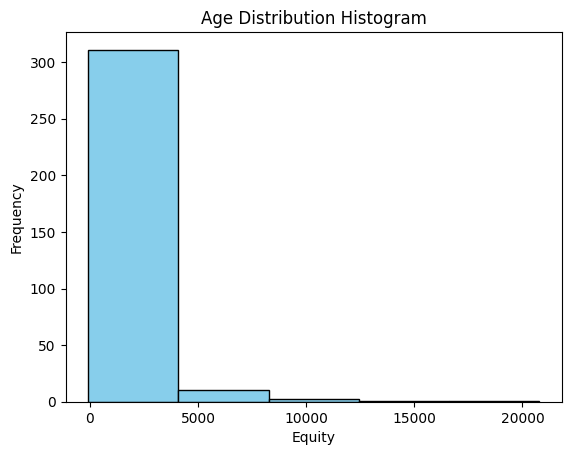

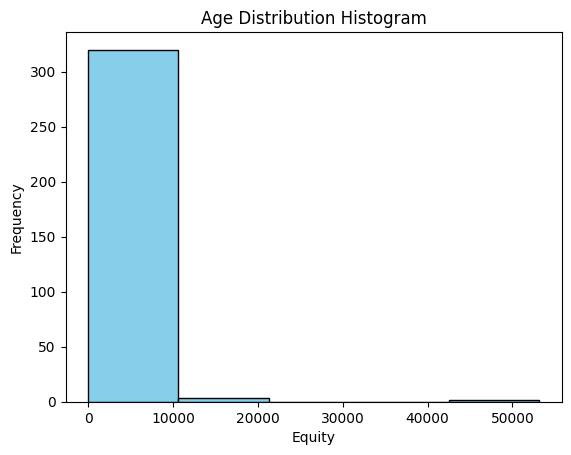

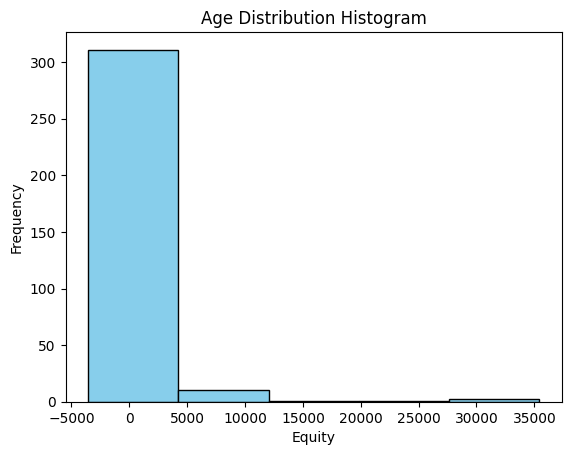

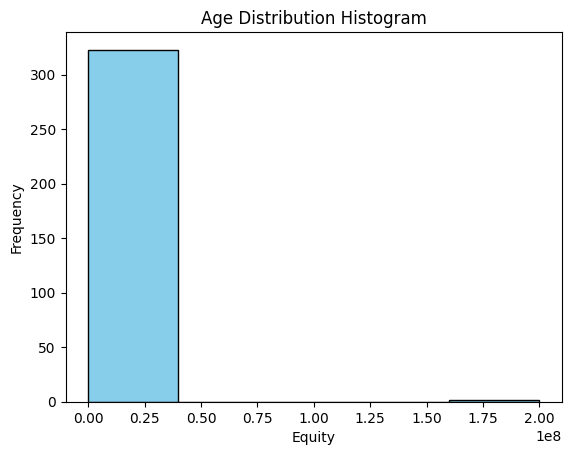

In [108]:
#graphical distribution

# Create a histogram for the 'Equity' column

plt.hist(cluster_data_1['Equity'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Equity')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Show the plot
plt.show()

# Create a histogram for the 'GWP' column
plt.hist(cluster_data_1['GWP'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Equity')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Show the plot
plt.show()



# Create a histogram for the 'NWP' column
plt.hist(cluster_data_1['NWP'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Equity')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Show the plot
plt.show()

# Create a histogram for the 'SCR_coverage_ratio' column
plt.hist(cluster_data_1['SCR_coverage_ratio'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Equity')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Show the plot
plt.show()

#As visible in the plots, data is not normally distributed and is skewed to the right.

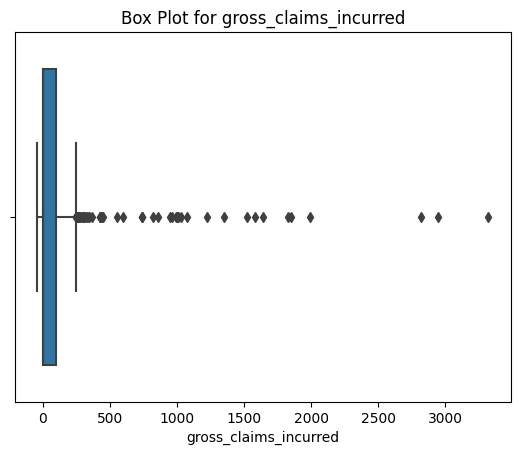

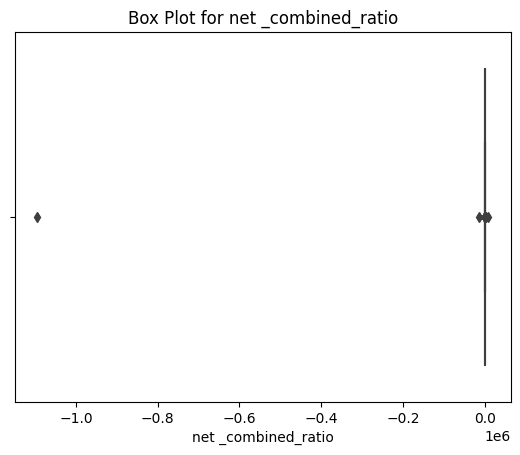

In [110]:
#creating a box plot to see the distribution of colums
# Create a box plot for the 'Age' column using Seaborn
sns.boxplot(x='gross_claims_incurred', data=cluster_data_2)

# Add title
plt.title('Box Plot for gross_claims_incurred')

# Show the plot
plt.show()

sns.boxplot(x='net _combined_ratio', data=cluster_data_2)

# Add title
plt.title('Box Plot for net _combined_ratio')

# Show the plot
plt.show()


Cluster Analysis

In [85]:
#joining cluster_dataset_1 and cluster_dataset_2 based in the column 'Firm'

inner_join_result = pd.merge(cluster_data_1, cluster_data_2, on='Firm')

print(inner_join_result)

#removing the column Firm from the final table
final_table = inner_join_result.drop('Firm', axis=1)
print(final_table)

Metric      Firm    Equity       GWP       NWP  SCR_coverage_ratio  \
0         Firm_1   249.664     9.354 -3550.820        1.117740e+07   
1        Firm_10  7289.004  6200.640  3269.050        1.118000e+00   
2       Firm_100   136.324    24.972    29.808        1.292000e+00   
3       Firm_101  7730.016  6633.498  3687.636        1.084000e+00   
4       Firm_102     2.346     0.000     0.000        2.734000e+00   
..           ...       ...       ...       ...                 ...   
320      Firm_95    20.168     0.008     0.004        6.122000e+00   
321      Firm_96    50.864    -0.002    -0.004        8.680000e-01   
322      Firm_97    54.188     7.500     6.196        2.018000e+00   
323      Firm_98     2.516     0.000     0.000        3.280000e+00   
324      Firm_99   292.400   511.272   193.010        1.362000e+00   

Metric  gross_claims_incurred  net _combined_ratio  
0                       0.002               14.260  
1                     111.120                0.804  


In [86]:
final_table_bu=final_table

In [87]:
final_table_bu

Metric,Equity,GWP,NWP,SCR_coverage_ratio,gross_claims_incurred,net _combined_ratio
0,249.664,9.354,-3550.820,1.117740e+07,0.002,14.260
1,7289.004,6200.640,3269.050,1.118000e+00,111.120,0.804
2,136.324,24.972,29.808,1.292000e+00,152.224,0.310
3,7730.016,6633.498,3687.636,1.084000e+00,0.000,0.000
4,2.346,0.000,0.000,2.734000e+00,304.844,1.168
...,...,...,...,...,...,...
320,20.168,0.008,0.004,6.122000e+00,0.000,0.000
321,50.864,-0.002,-0.004,8.680000e-01,344.746,0.368
322,54.188,7.500,6.196,2.018000e+00,98.280,0.488
323,2.516,0.000,0.000,3.280000e+00,0.000,0.000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

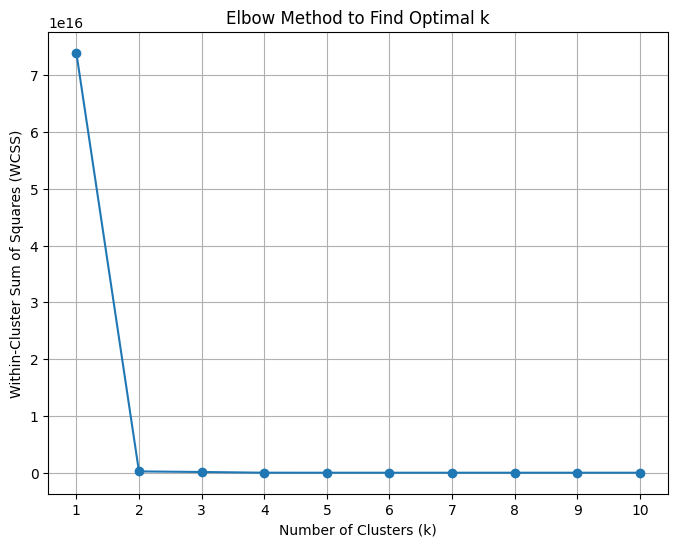

In [47]:
#elbow method to see the optimal number of clusters
# Initialize empty list to store the sum of squared distances (inertia) for each k
inertia = []

# Try different values of k (number of clusters)
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(final_table)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#As visible, 1 is the optial number of clusters

In [48]:
final_table

Metric,Equity,GWP,NWP,SCR_coverage_ratio,gross_claims_incurred,net _combined_ratio
0,249.664,9.354,-3550.820,1.117740e+07,0.002,14.260
1,7289.004,6200.640,3269.050,1.118000e+00,111.120,0.804
2,136.324,24.972,29.808,1.292000e+00,152.224,0.310
3,7730.016,6633.498,3687.636,1.084000e+00,0.000,0.000
4,2.346,0.000,0.000,2.734000e+00,304.844,1.168
...,...,...,...,...,...,...
320,20.168,0.008,0.004,6.122000e+00,0.000,0.000
321,50.864,-0.002,-0.004,8.680000e-01,344.746,0.368
322,54.188,7.500,6.196,2.018000e+00,98.280,0.488
323,2.516,0.000,0.000,3.280000e+00,0.000,0.000


In [68]:
#considering all columns
# Create and fit the KMeans model with k=2 (number of clusters)
kmeans = KMeans(n_clusters=2)
kmeans.fit(final_table)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels as a new column in the DataFrame
final_table['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
color=['Blue','Red']
final_table['color']=final_table['Cluster'].map(lambda p: color[p])



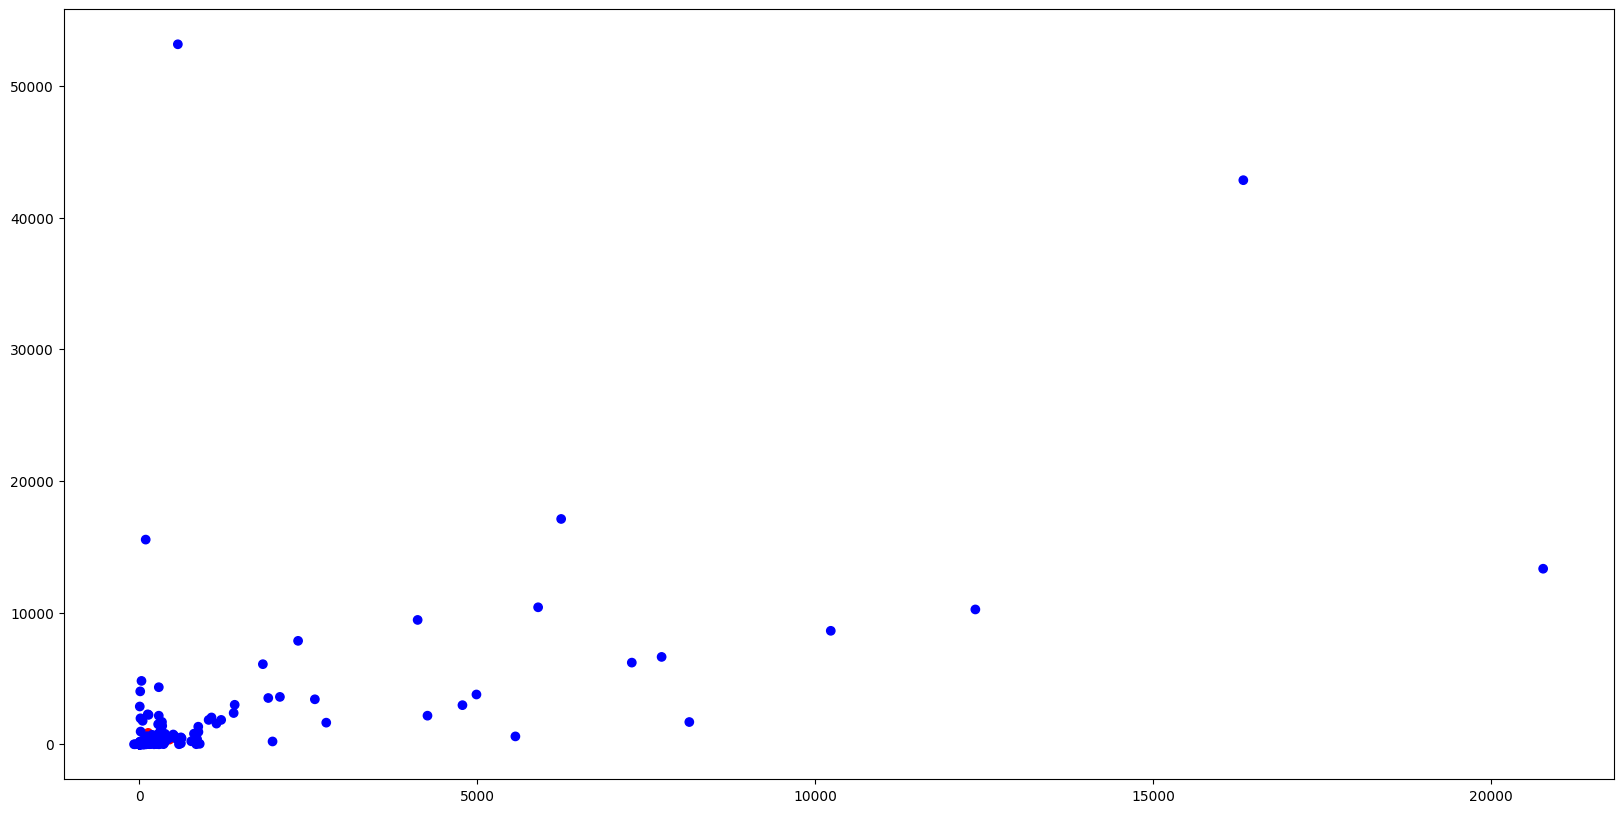

In [70]:
plt.figure(figsize=(20,10))
plt.scatter(final_table["Equity"],
            final_table["GWP"],
            c=final_table["color"])

#most clusters are in group 1

In [71]:
final_table

Metric,Equity,GWP,NWP,SCR_coverage_ratio,gross_claims_incurred,net _combined_ratio,Cluster,color
0,249.664,9.354,-3550.820,1.117740e+07,0.002,14.260,0,Blue
1,7289.004,6200.640,3269.050,1.118000e+00,111.120,0.804,0,Blue
2,136.324,24.972,29.808,1.292000e+00,152.224,0.310,0,Blue
3,7730.016,6633.498,3687.636,1.084000e+00,0.000,0.000,0,Blue
4,2.346,0.000,0.000,2.734000e+00,304.844,1.168,0,Blue
...,...,...,...,...,...,...,...,...
320,20.168,0.008,0.004,6.122000e+00,0.000,0.000,0,Blue
321,50.864,-0.002,-0.004,8.680000e-01,344.746,0.368,0,Blue
322,54.188,7.500,6.196,2.018000e+00,98.280,0.488,0,Blue
323,2.516,0.000,0.000,3.280000e+00,0.000,0.000,0,Blue


PCA ANALYSIS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


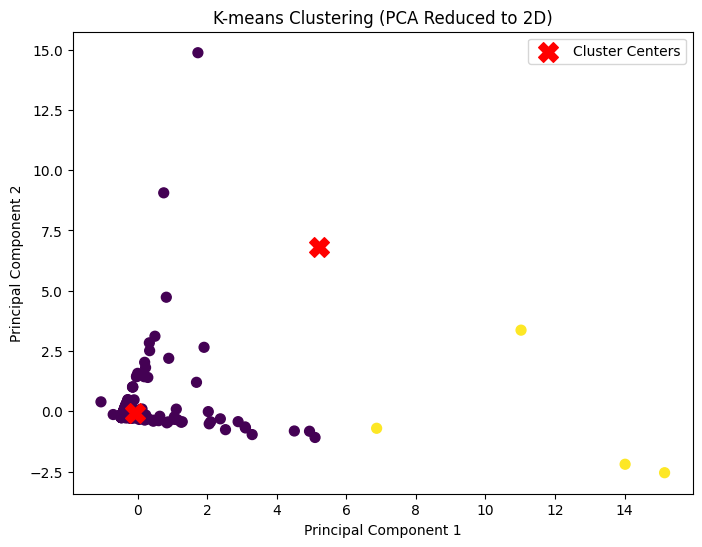

In [72]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


column_names = ['Equity', 'GWP', 'NWP', 'SCR_coverage_ratio', 'gross_claims_incurred', 'net _combined_ratio']


X = final_table[column_names].values

# Standardize the data (important for K-means and many other clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of clusters (k) based on elbow method
num_clusters = 2  # Replace this with the desired number of clusters

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Apply PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (PCA Reduced to 2D)')
plt.legend()
plt.show()

In [73]:
# Get the loadings for each column in the DataFrame after applying PCA
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=column_names)

print("Loadings for each column:")
print(loadings)

Loadings for each column:
                            PC1       PC2
Equity                 0.498206 -0.023209
GWP                    0.591953 -0.132997
NWP                    0.606809 -0.092714
SCR_coverage_ratio     0.039322  0.720657
gross_claims_incurred  0.175714  0.673646
net _combined_ratio    0.027264 -0.005714


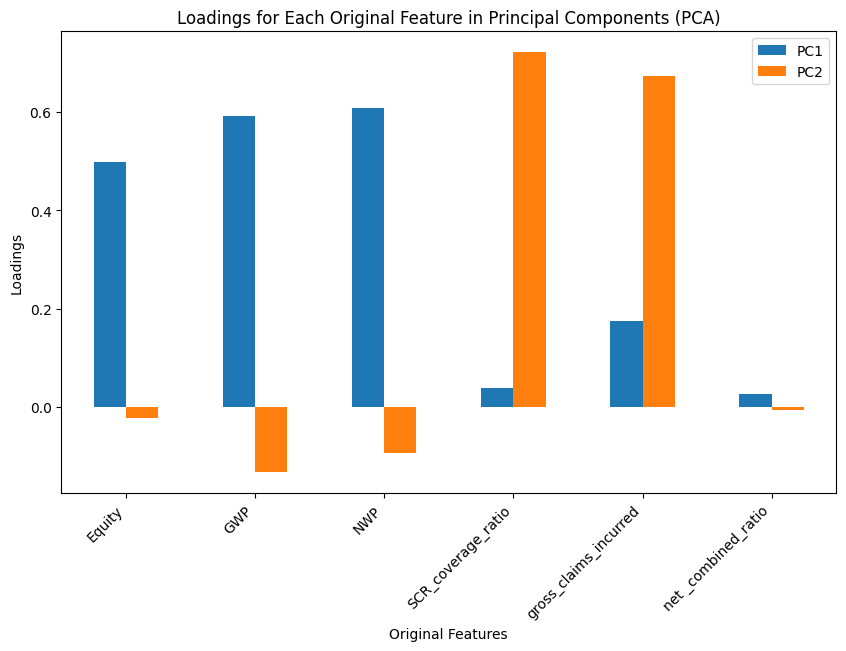

In [74]:
# Visualize the loadings using a bar plot
plt.figure(figsize=(10, 6))
loadings.plot(kind='bar', ax=plt.gca())
plt.xlabel('Original Features')
plt.ylabel('Loadings')
plt.title('Loadings for Each Original Feature in Principal Components (PCA)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [75]:
# Get explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Find which PC explains maximum variance
max_variance_pc = explained_variance_ratio.argmax() + 1

print(f"Principal Component {max_variance_pc} explains the maximum variance.")

plt.show()

Principal Component 1 explains the maximum variance.


In [89]:
print(final_table_bu)

Metric    Equity       GWP       NWP  SCR_coverage_ratio  \
0        249.664     9.354 -3550.820        1.117740e+07   
1       7289.004  6200.640  3269.050        1.118000e+00   
2        136.324    24.972    29.808        1.292000e+00   
3       7730.016  6633.498  3687.636        1.084000e+00   
4          2.346     0.000     0.000        2.734000e+00   
..           ...       ...       ...                 ...   
320       20.168     0.008     0.004        6.122000e+00   
321       50.864    -0.002    -0.004        8.680000e-01   
322       54.188     7.500     6.196        2.018000e+00   
323        2.516     0.000     0.000        3.280000e+00   
324      292.400   511.272   193.010        1.362000e+00   

Metric  gross_claims_incurred  net _combined_ratio  
0                       0.002               14.260  
1                     111.120                0.804  
2                     152.224                0.310  
3                       0.000                0.000  
4             

In [91]:
#creating model dataset for supervised learning
model_data=final_table_bu
model_data

Metric,Equity,GWP,NWP,SCR_coverage_ratio,gross_claims_incurred,net _combined_ratio
0,249.664,9.354,-3550.820,1.117740e+07,0.002,14.260
1,7289.004,6200.640,3269.050,1.118000e+00,111.120,0.804
2,136.324,24.972,29.808,1.292000e+00,152.224,0.310
3,7730.016,6633.498,3687.636,1.084000e+00,0.000,0.000
4,2.346,0.000,0.000,2.734000e+00,304.844,1.168
...,...,...,...,...,...,...
320,20.168,0.008,0.004,6.122000e+00,0.000,0.000
321,50.864,-0.002,-0.004,8.680000e-01,344.746,0.368
322,54.188,7.500,6.196,2.018000e+00,98.280,0.488
323,2.516,0.000,0.000,3.280000e+00,0.000,0.000


In [95]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


# Separate the features and target variables
X = model_data.drop('Equity', axis=1)
y = model_data['Equity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Epoch 1/100
9/9 [==============================] - 1s 4ms/step - loss: 3340850.0000
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 3340230.0000
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 3339704.2500
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 3338996.2500
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 3338313.7500
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 3337600.0000
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 3336593.2500
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 3335692.7500
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 3334455.7500
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 3333077.2500
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 3331349.7500
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 33